In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from multitools import make_pos_def, gamma_GC

In [3]:
# parameters # four variables: 3 objectives, 1 constraints
nobj = 3
ncon = 1
r = np.array([      
    [1.0, 0.4, -0.5, 0.3],
    [0.4, 1.0, 0.5, 0.4],
    [-0.5, 0.5, 1.0, 0.2],
    [0.3, 0.4, 0.2, 1.0],
])

shape, scale = [3.0, 3.0, 1.0, 8.0], [1.0, 1.5, 3.0,1.0]

In [4]:
n = 200
samples = gamma_GC(r, n, shape, scale)

In [5]:
def cleanupsamples(samples,nobj,precision=1): 
    samples = np.round(samples,precision)
    c,i = np.unique(samples[:,:nobj], axis=0, return_index=True)
    newsamples = samples[i,:] #note - these have been sorted into increasing magnitude.  
    return newsamples

In [6]:
samples = cleanupsamples(samples,nobj,precision=0)
print(f"Number of unique samples: {samples.shape[0]}")

Number of unique samples: 123


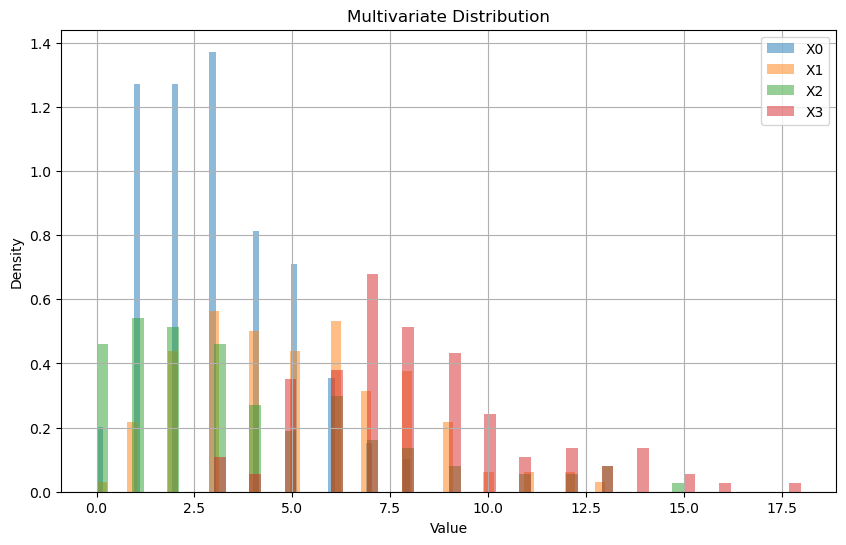

In [7]:
n_dims = samples.shape[1]

plt.figure(figsize=(10, 6))
for i in range(n_dims):
    plt.hist(samples[:, i], bins=50, density=True, alpha=0.5, label=f"X{i}")

plt.title("Multivariate Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
# plt.xlim(0, 6)
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='value', ylabel='Density'>

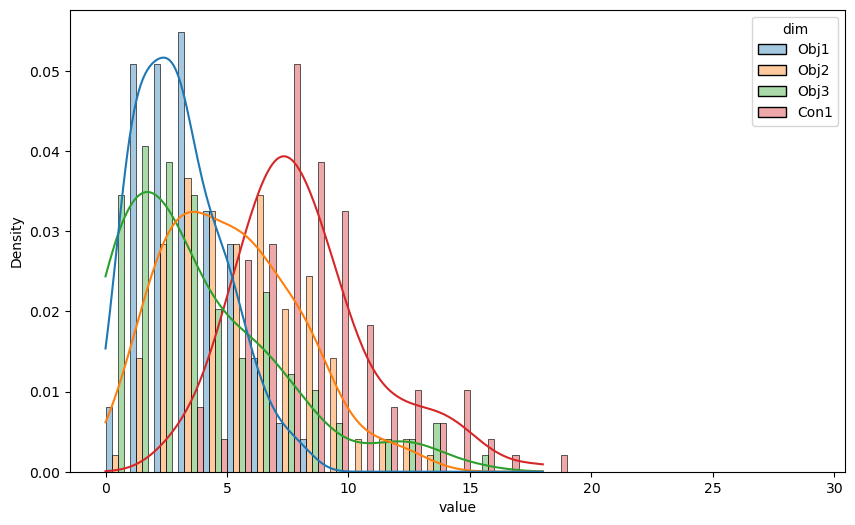

In [ ]:
# Convert to DataFrame and melt to long format for seaborn
df = pd.DataFrame(samples, columns=['Obj1','Obj2','Obj3','Con1'])
df_long = df.melt(var_name="dim", value_name="value")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_long,
    x="value",
    hue="dim",
    bins=np.arange(0, 30, 1),
    stat="density",
    element="bars",
    fill=True,
    common_bins = True,
    multiple="dodge",
    alpha=0.4,
    kde=True 
)
plt.show()



In [9]:
def non_dominated(objectives):
    n_solutions = objectives.shape[0]
    non_dominated = np.ones(n_solutions, dtype=bool)
    for i in range(n_solutions):
        for j in range(n_solutions):
            if i == j:
                continue

            if np.all(objectives[j, :] >= objectives[i, :]) and \
                np.any(objectives[j, :] > objectives[i, :]):
                non_dominated[i] = False
                break

    return non_dominated

In [15]:
x = np.flipud(np.sort(samples, axis=0))

In [16]:
print(x[:10,:])

[[ 8. 13. 15. 18.]
 [ 8. 12. 13. 16.]
 [ 7. 12. 13. 15.]
 [ 7. 11. 13. 15.]
 [ 7. 11. 12. 14.]
 [ 6. 10. 12. 14.]
 [ 6. 10. 11. 14.]
 [ 6.  9. 11. 14.]
 [ 6.  9.  9. 14.]
 [ 6.  9.  9. 13.]]


In [31]:
from itertools import combinations, islice
y = np.flip(np.array([0,1,2,3,4,5,6,7,8,9 ]))
x = np.array(list(combinations(y,3)))
z = np.array(list(islice(combinations(y,3),101,140)))
print('Z', z)

Z [[5 4 2]
 [5 4 1]
 [5 4 0]
 [5 3 2]
 [5 3 1]
 [5 3 0]
 [5 2 1]
 [5 2 0]
 [5 1 0]
 [4 3 2]
 [4 3 1]
 [4 3 0]
 [4 2 1]
 [4 2 0]
 [4 1 0]
 [3 2 1]
 [3 2 0]
 [3 1 0]
 [2 1 0]]


In [ ]:
ksize = 5 
n_items = samples.shape[0]
kconstraint = shape[-1]*scale[-1]*ksize
objectives = []
solutions = []

for combo in it.combinations(range(n_items), n_selected):
    solution = test_trial.iloc[list(combo)]

    # test if the solution exceeds capacity
    if np.abs(solution["Money"].sum()) > np.abs(solution["capacity1"].iloc[0]) or \
          np.abs(solution["Space"].sum()) > np.abs(solution["capacity2"].iloc[0]):
        continue

    # computes objective values
    objective = [
        solution["Science"].sum(),
        solution["Culture"].sum(),
        solution["Govern"].sum()
    ]
    objectives.append(objective)

    solutions.append(combo)

objectives = np.array(objectives) # shape = (num of solutions, num of objectives)
solutions = np.array(solutions) # shape = (num of solutions, num of items)


NameError: name 'it' is not defined